In [1]:
import pyreadr as pr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
data = pr.read_r("TenneT_15min.Rda")

In [3]:
df = data[list(data.keys())[0]]

start_date = '2023-09-01'
end_date = '2024-09-30'

df_filtered = df[(df['date_AMS_str'] >= start_date) & (df['date_AMS_str'] <= end_date)]

df_filtered.head()

,CET_dt,date_AMS_str,time_AMS_str,date_CET_str,time_CET_str,Isp,c_up,c_do,r_up,r_do,r_up_str,r_do_str,p_c_up,p_c_do,p_x_up,p_x_do,delta,x_up,x_do,tmp
163484,2023-08-31 22:00:00,2023-09-01,00:00,2023-08-31,23:00,1,0.0,0.000,0.0,0.0,NO,NO,NaN,NaN,81.06,81.06,0,107.188,75.567,NaN
163485,2023-08-31 22:15:00,2023-09-01,00:15,2023-08-31,23:15,2,0.0,0.000,0.0,0.0,NO,NO,NaN,NaN,81.04,81.04,0,88.632,68.200,NaN
163486,2023-08-31 22:30:00,2023-09-01,00:30,2023-08-31,23:30,3,0.0,0.887,0.0,0.0,NO,NO,NaN,75.91,75.91,75.91,-1,93.475,76.508,NaN
163487,2023-08-31 22:45:00,2023-09-01,00:45,2023-08-31,23:45,4,0.0,6.469,0.0,0.0,NO,NO,NaN,76.48,76.48,76.48,-1,84.560,75.757,NaN
163488,2023-08-31 23:00:00,2023-09-01,01:00,2023-09-01,00:00,5,0.0,1.973,0.0,0.0,NO,NO,NaN,73.64,73.64,73.64,-1,99.109,95.781,NaN


In [4]:
statistics = df.describe().T
statistics

,count,mean,min,25%,50%,75%,max,std
CET_dt,223004,2022-03-07 19:44:43.364424192,2018-12-31 23:00:00,2020-08-03 16:41:15,2022-03-07 10:22:30,2023-10-10 04:03:45,2025-05-13 21:45:00,NaN
Isp,223004.0,48.499605,1.0,24.0,48.0,72.0,100.0,27.71168
c_up,223004.0,9.327309,0.0,0.0,0.249,10.25225,197.168,17.934379
c_do,223004.0,8.869751,0.0,0.0,0.259,10.133,258.931,17.264152
r_up,223004.0,0.349496,0.0,0.0,0.0,0.0,269.707,6.083279
r_do,223004.0,0.090476,0.0,0.0,0.0,0.0,224.478,2.863109
p_c_up,121597.0,171.397427,-10.0,50.31,103.82,198.45,2940.0,220.821516
p_c_do,122937.0,30.738351,-1861.69,-5.33,28.23,72.01,544.79,110.342245
p_x_up,223004.0,93.518126,-1861.69,22.21,56.25,120.2625,2940.0,181.446366
p_x_do,223004.0,105.407113,-1593.1,26.42,64.975,130.2825,2940.0,186.392756


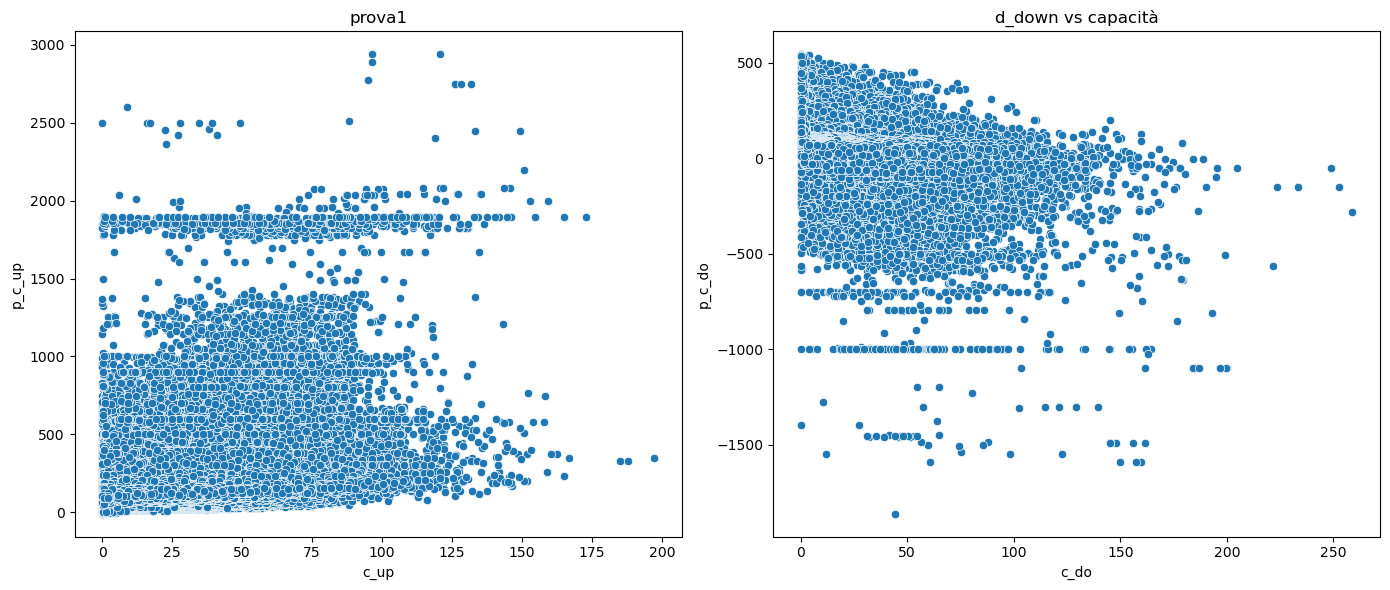

In [5]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='x_up', y='p_c_up', data=df)
plt.title('prova1')

plt.subplot(1, 2, 2)
sns.scatterplot(x='c_do', y='p_c_do', data=df)
plt.title('d_down vs capacità')

plt.tight_layout()
plt.show()


In [6]:
df['capacity']=df['c_up']-df['c_do']
sigma_c=df['capacity'].std()
rho_c=df['capacity'].autocorr()
df['imbalance']=df['x_up']-df['x_do']
sigma_x=df['imbalance'].std()
df['price'] = (df['p_x_up'] + df['p_x_do']) / 2
sigma_p=df['price'].std()

print('σ_c= ', sigma_c)
print('ρ_c= ',rho_c)
print('σ_x= ', sigma_x)
print('σ_p= ', sigma_p)

σ_c=  27.82622306905281
ρ_c=  0.7366063724836757
σ_x=  61.27207599708963
σ_p=  179.46220654614018
